# ZONIFICACIÓN DE LAS VENTAS

Sesiones utilizadas:
- Algoritmos no supervisados (3)
- Arena de clasificadores (7)

Observaciones
- Revisar detalles que pudieran haber
- Mover para acá lo de los clasificadores

#### Instalamos lazypredict

In [ ]:
# Instalacion de libreria
# %pip install lazypredict

#### Importaciones

In [39]:
# Librerías generales

import pandas as pd                                     # Importaciín y manipulación de dataframes
import numpy as np                                      # Trabajar con dataframe
import matplotlib.pyplot as plt                         # Trabajar con gráficas

# Librerías de Machine learning
from sklearn.model_selection import train_test_split    # Entrenar modelos
from sklearn.cluster import KMeans                      # Trabajar con el modelo KMeans
import MLUtilities as utils                             # Para la separación de datos
from scipy import stats                                 # Para la separación de datos
from sklearn.metrics import confusion_matrix            # para la Matriz de Confusión

# Clasificadores
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.svm import SVC                             # Support Vector Classifier
from sklearn.neural_network import MLPClassifier        # Neural Network
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier 
# import lazypredict
# from lazypredict import LazyClassifier                  # LazyClassifier


#### Definición de funciones

In [42]:
# Función que particiona un dataframe en tres partes dependiendo un porcentaje: entrenamiento, validación y prueba
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    print(temp_size)
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

## Función que calcula la distancia eucilidiana:
def distEuclidiana(muestra, dataset):
    distancias = np.zeros((dataset.shape[0],1))
    for counter in range(0,dataset.shape[0]):
        distancias[counter] = np.linalg.norm(muestra-dataset[counter])
    return distancias

# Fuención que encuentar el centroide mas cercano
def centroideCercano(muestra, listaCentroides):
    listaDistancias = distEuclidiana(muestra, listaCentroides)
    centroideCercano = np.argmin(listaDistancias)
    return centroideCercano

# Función que separa datos dependiendo de la etiqueta de valor esperado que tengan
def separarDatos(muestras, valoresEsperados, valorAFiltrar):
    indices = np.where(valoresEsperados == valorAFiltrar)
    return muestras[indices], valoresEsperados[indices]

# Función para obtener la moda
def obtenerModa(resultados):
    moda = (stats.mode(resultados)[0]).reshape(-1)
    return moda[0]

# Función para obtener la accuracy de una muestra con K medias
def obtenerAccuracy_kmedias(muestras, centroides):
    numMuestras = muestras.shape[0]
    
    resultados = utils.clasificarPorCentroides(muestras, centroides)
    moda = obtenerModa(resultados)
    
    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])
    accuracy = ((numMuestras - cantidadErrores) / numMuestras) *100
    return accuracy

# Función para obtener la accuracy por medio de la Matriz de confusión
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

# Función para obtener la sensibilidad por medio de la Matriz de confusión
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

# Función para obtener la especificidad por medio de la Matriz de confusión
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

# Función que nos despliega los resultados de las evaluaciones de los clasificadores
def evaluar(y_test, y_pred):
    # Obtención de los resultados de una matriz de confusión de 4x4
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    print(resultado.shape)
    
    # Extraemos la flattened_array
    flattened_array = resultado.ravel()
    
    # Definir posiciones para cada valor
    TN_pos = 0                                                                      # Esquina superior izquierda
    FP_pos = TN_pos + resultado.shape[1] - 1                                        # Esquina superior derecha
    # FN_pos = FP_pos + resultado.shape[0] * resultado.shape[1] - 1                   # Esquina inferior izquierda
    FN_pos = FP_pos + resultado.shape[0] + resultado.shape[1] + 1                   # Esquina inferior izquierda
    TP_pos = FN_pos + resultado.shape[1] - 1                                        # Esquina inferior derecha
    
    # Extremos valores de TN, FP, FN, TP 
    TN = flattened_array[TN_pos]
    FP = flattened_array[FP_pos]
    FN = flattened_array[FN_pos]
    TP = flattened_array[TP_pos]

    # Imprimir los valores obtenidos
    # print("True positives: "+str(TP))             # Ejemplo de otra forma de desplegar los resultados    
    print("True positives:", TP)
    print("True negatives:", TN)
    print("False positives:", FP)
    print("False negative:", FN)

    # Determinación de los indicadores
    acc = round((calcularAccuracy(TP, TN, FP, FN)),3)
    sen = round((calcularSensibilidad(TP, TN, FP, FN)),3)
    spec = round((calcularEspecificidad(TP, TN, FP, FN)),3)
    
    print(f'Precision: {acc} %.')
    print(f'Sensibilidad: {sen} %.')
    print(f'Especificidad: {spec} %.')

# Función que recomienda productos

def recomiendameProductos(listaDeProductos, datosProductos,productosEjemplo,centroides):
    clasificacionDeseada = utils.centroideCercano(productosEjemplo, centroides)     # Vamos a buscar el centroide mas cercano (con MLUtilities ;))
    clasificaciones = utils.clasificarPorCentroides(datosProductos, centroides)     # Luego, vamos a clasificar todas las peliculas por centroides
    indices = np.where(clasificaciones == clasificacionDeseada)[0]                  # Finalmente, sacaremos los indices que hacen match entre clasificaciones
    return listaDeProductos[indices]                                                # Y regresamos la lista de peliculas.




# Fin de la definición de funciones
print('Funciones definidas')

Funciones definidas


## ALGORITMOS NO SUPERVISADOS

In [5]:
# IMPORTACIÓN DEL DATASET ORIGINAL
df_online_sales = pd.read_csv('dataset/online-sales-usa.csv')           # Importamos el dataset
df_online_sales['item_id'] = df_online_sales['item_id'].astype('int')          # Cambiamos el tipo de datos de date_OK
df_online_sales.head()                                                  # Revisamos el dataframe

C:\Users\aizam\AppData\Local\Temp\ipykernel_35392\4037807346.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_online_sales = pd.read_csv('dataset/online-sales-usa.csv')           # Importamos el dataset


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,PhoneNo,PlaceName,County,City,State,Zip,Region,UserName,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [6]:
# DATASET ANALIZABLE

df_online_sales = pd.read_csv('dataset/online_sales_analize_full.csv', index_col=0)
df_online_sales.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,CustomerSince,PlaceName,County,City,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,1798.0,0.0,1798.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,190.0,0.0,190.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,1199.2,0.0,1199.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,639.2,0.0,639.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,99.9,0.0,99.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
5,12669,2020-11-13,12,595186,27274,2,39.9,39.9,0.0,39.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
6,12672,2020-11-13,6,595192,21354,2,47.6,47.6,0.0,47.6,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
7,1,2020-10-01,1,574769,12499,2,49.0,49.0,0.0,49.0,...,1981-02-04,5489,272,5489,10,32042,3,0.0,NaN,NaN
8,1,2020-10-01,1,574770,47760,2,135.0,135.0,0.0,135.0,...,1981-02-04,5489,272,5489,10,32042,3,0.0,NaN,NaN
9,1,2020-10-01,1,574771,12545,2,549.9,549.9,0.0,549.9,...,1981-02-04,5489,272,5489,10,32042,3,0.0,NaN,NaN


In [7]:
# Quitamos los valores Nan convirtiendolos en 0
df_online_sales_cn = df_online_sales
df_online_sales_cn[['lat', 'lng']] = df_online_sales_cn[['lat', 'lng']].fillna(0)
df_online_sales_cn.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,CustomerSince,PlaceName,County,City,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,1798.0,0.0,1798.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,190.0,0.0,190.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,1199.2,0.0,1199.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,639.2,0.0,639.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,99.9,0.0,99.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
5,12669,2020-11-13,12,595186,27274,2,39.9,39.9,0.0,39.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
6,12672,2020-11-13,6,595192,21354,2,47.6,47.6,0.0,47.6,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
7,1,2020-10-01,1,574769,12499,2,49.0,49.0,0.0,49.0,...,1981-02-04,5489,272,5489,10,32042,3,0.0,0.0000,0.00000
8,1,2020-10-01,1,574770,47760,2,135.0,135.0,0.0,135.0,...,1981-02-04,5489,272,5489,10,32042,3,0.0,0.0000,0.00000
9,1,2020-10-01,1,574771,12545,2,549.9,549.9,0.0,549.9,...,1981-02-04,5489,272,5489,10,32042,3,0.0,0.0000,0.00000


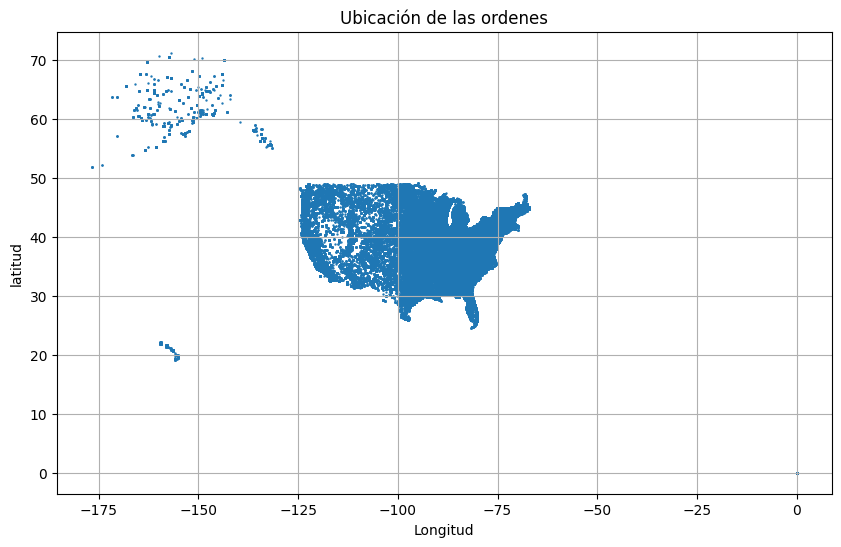

In [8]:
# Creamos un gráfico con las coordenadas de cada orden considerando los valores nulos (convertidos a ceros)
latitud_col = 'lat'
longitud_col = 'lng'

plt.figure(figsize=(10, 6))
plt.scatter(df_online_sales_cn[longitud_col], df_online_sales_cn[latitud_col], s=0.5)
plt.xlabel('Longitud')
plt.ylabel('latitud')
plt.title('Ubicación de las ordenes')
plt.grid(True)
plt.show()

In [9]:
df_online_sales_cn.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,CustomerSince,PlaceName,County,City,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,1798.0,0.0,1798.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,190.0,0.0,190.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,1199.2,0.0,1199.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,639.2,0.0,639.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,99.9,0.0,99.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
5,12669,2020-11-13,12,595186,27274,2,39.9,39.9,0.0,39.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
6,12672,2020-11-13,6,595192,21354,2,47.6,47.6,0.0,47.6,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.9325,-99.92476
7,1,2020-10-01,1,574769,12499,2,49.0,49.0,0.0,49.0,...,1981-02-04,5489,272,5489,10,32042,3,0.0,0.0000,0.00000
8,1,2020-10-01,1,574770,47760,2,135.0,135.0,0.0,135.0,...,1981-02-04,5489,272,5489,10,32042,3,0.0,0.0000,0.00000
9,1,2020-10-01,1,574771,12545,2,549.9,549.9,0.0,549.9,...,1981-02-04,5489,272,5489,10,32042,3,0.0,0.0000,0.00000


In [10]:
# Del dataframe con lso nan convertidos a ceros, quitamos las filas con valores Nan o 0
df_online_sales_sn = df_online_sales_cn
# df_online_sales_sn.head(10)
#df_online_sales_sn = df_online_sales_sn.dropna(subset=['lat', 'lng'], inplace=True)
df_online_sales_sn = df_online_sales_sn.drop(df_online_sales_sn[(df_online_sales_sn['lat'] == 0) | (df_online_sales_sn['lng'] == 0)].index)
# print(df_online_sales_sn)
df_online_sales_sn.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,CustomerSince,PlaceName,County,City,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,1798.0,0.0,1798.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,190.0,0.0,190.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,1199.2,0.0,1199.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,639.2,0.0,639.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,99.9,0.0,99.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
5,12669,2020-11-13,12,595186,27274,2,39.9,39.9,0.0,39.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
6,12672,2020-11-13,6,595192,21354,2,47.6,47.6,0.0,47.6,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
28,3,2020-10-01,1,574775,3891,2,166.5,166.5,0.0,166.5,...,2010-06-27,5507,933,5507,29,58201,1,0.0,47.86938,-97.14013
29,3,2020-10-01,1,574776,47658,2,140.0,140.0,0.0,140.0,...,2010-06-27,5507,933,5507,29,58201,1,0.0,47.86938,-97.14013
30,4139,2020-10-22,1,582021,371,2,199.0,199.0,0.0,199.0,...,2010-06-27,5507,933,5507,29,58201,1,0.0,47.86938,-97.14013


In [11]:
# Comparamos dataframes
filas_con_nans = len(df_online_sales_cn)
filas_sin_nans = len(df_online_sales_sn)
nans= filas_con_nans - filas_sin_nans
print(f'Total de filas incluyendo valores NaN: {filas_con_nans}')
print(f'Total de filas excluyendo valores NaN: {filas_sin_nans}')
print(f'Filas con valores naN: {nans}')

Total de filas incluyendo valores NaN: 286392
Total de filas excluyendo valores NaN: 224119
Filas con valores naN: 62273


In [12]:
# Visualizamos el dataframe f_online_sales_sn
# df_online_sales_sn.head(10)

# Reseteamos su índice
df_online_sales_sn = df_online_sales_sn.reset_index(drop=True)

# Visualizamos el dataframe f_online_sales_sn
df_online_sales_sn.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,CustomerSince,PlaceName,County,City,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,1798.0,0.0,1798.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,190.0,0.0,190.0,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,1199.2,0.0,1199.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,639.2,0.0,639.2,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,99.9,0.0,99.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
5,12669,2020-11-13,12,595186,27274,2,39.9,39.9,0.0,39.9,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
6,12672,2020-11-13,6,595192,21354,2,47.6,47.6,0.0,47.6,...,2006-08-22,14759,1006,14759,37,73571,3,0.0,34.93250,-99.92476
7,3,2020-10-01,1,574775,3891,2,166.5,166.5,0.0,166.5,...,2010-06-27,5507,933,5507,29,58201,1,0.0,47.86938,-97.14013
8,3,2020-10-01,1,574776,47658,2,140.0,140.0,0.0,140.0,...,2010-06-27,5507,933,5507,29,58201,1,0.0,47.86938,-97.14013
9,4139,2020-10-22,1,582021,371,2,199.0,199.0,0.0,199.0,...,2010-06-27,5507,933,5507,29,58201,1,0.0,47.86938,-97.14013


In [13]:
# Determinamos los ejes
eje_x = df_online_sales_sn['lng']
eje_y = df_online_sales_sn['lat']

# Analizar después si conservamos estas variables
latitud_col = 'lat'
longitud_col = 'lng'

# Visualizamos alguno de los ejes
print(eje_x)


0        -99.92476
1        -99.92476
2        -99.92476
3        -99.92476
4        -99.92476
            ...   
224114   -77.23958
224115   -84.06924
224116   -78.89872
224117   -78.89872
224118   -83.85909
Name: lng, Length: 224119, dtype: float64


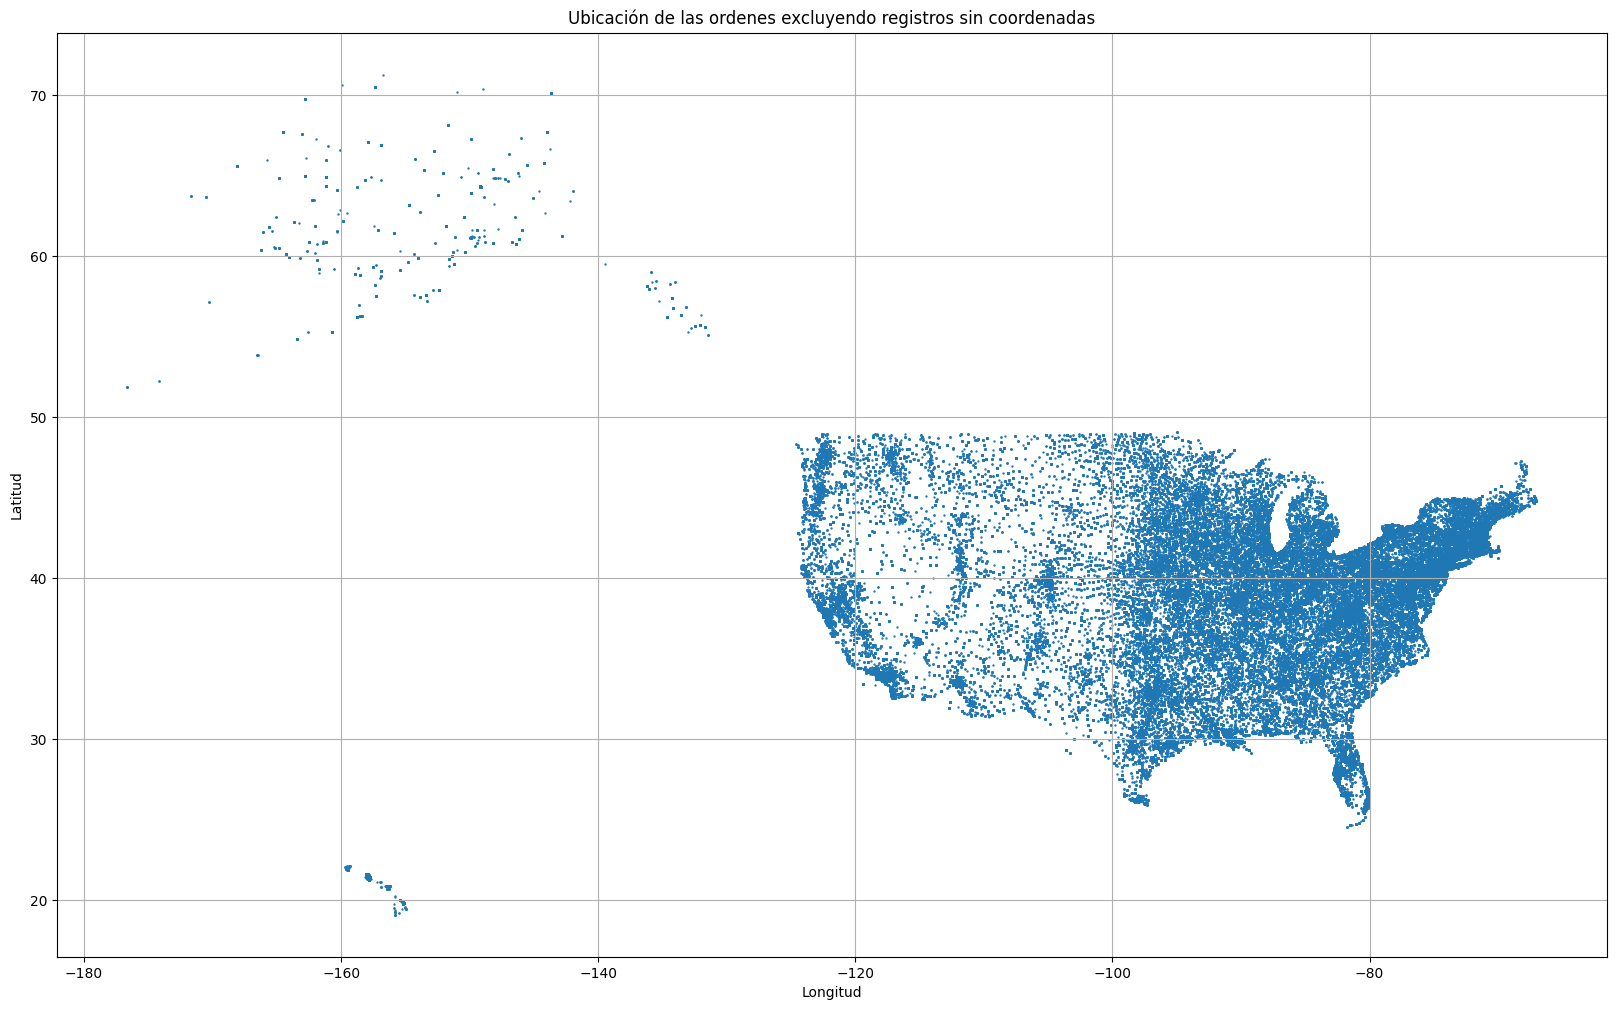

In [14]:
# Creamos un gráfico con las coordenadas de cada orden excluyendo los registros sin coordenadas
plt.figure(figsize=(20, 12))
plt.scatter(eje_x, eje_y, s=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de las ordenes excluyendo registros sin coordenadas')
plt.grid(True)
plt.show()

#### Posibles usos en el dataframe:
- Recomendaciones de productos para clientes
- Estimado de ventas de ciertos productos
- Determinación de centros de distribución (investigar coordenadas de los ZIP)

### Desarrollo de código

## Algoritmo no supervisado: K-Nearest-Neighbors

In [15]:
# HACEMOS LAS DEFINICIONES
X = df_online_sales_sn[['lng', 'lat']].to_numpy()           # Definimos el clustering con las coordenadas
# Y = df_online_sales_sn['Region']                          # Definimos Y sin convertir a un array
Y = df_online_sales_sn['Region'].to_numpy()                 # Definimos Y
k = 4                                                       # Declaramos los clusters
# Definimos los tamaños de las particiones
size_train = 0.60
size_valida = 0.10
size_test = 0.30                                      

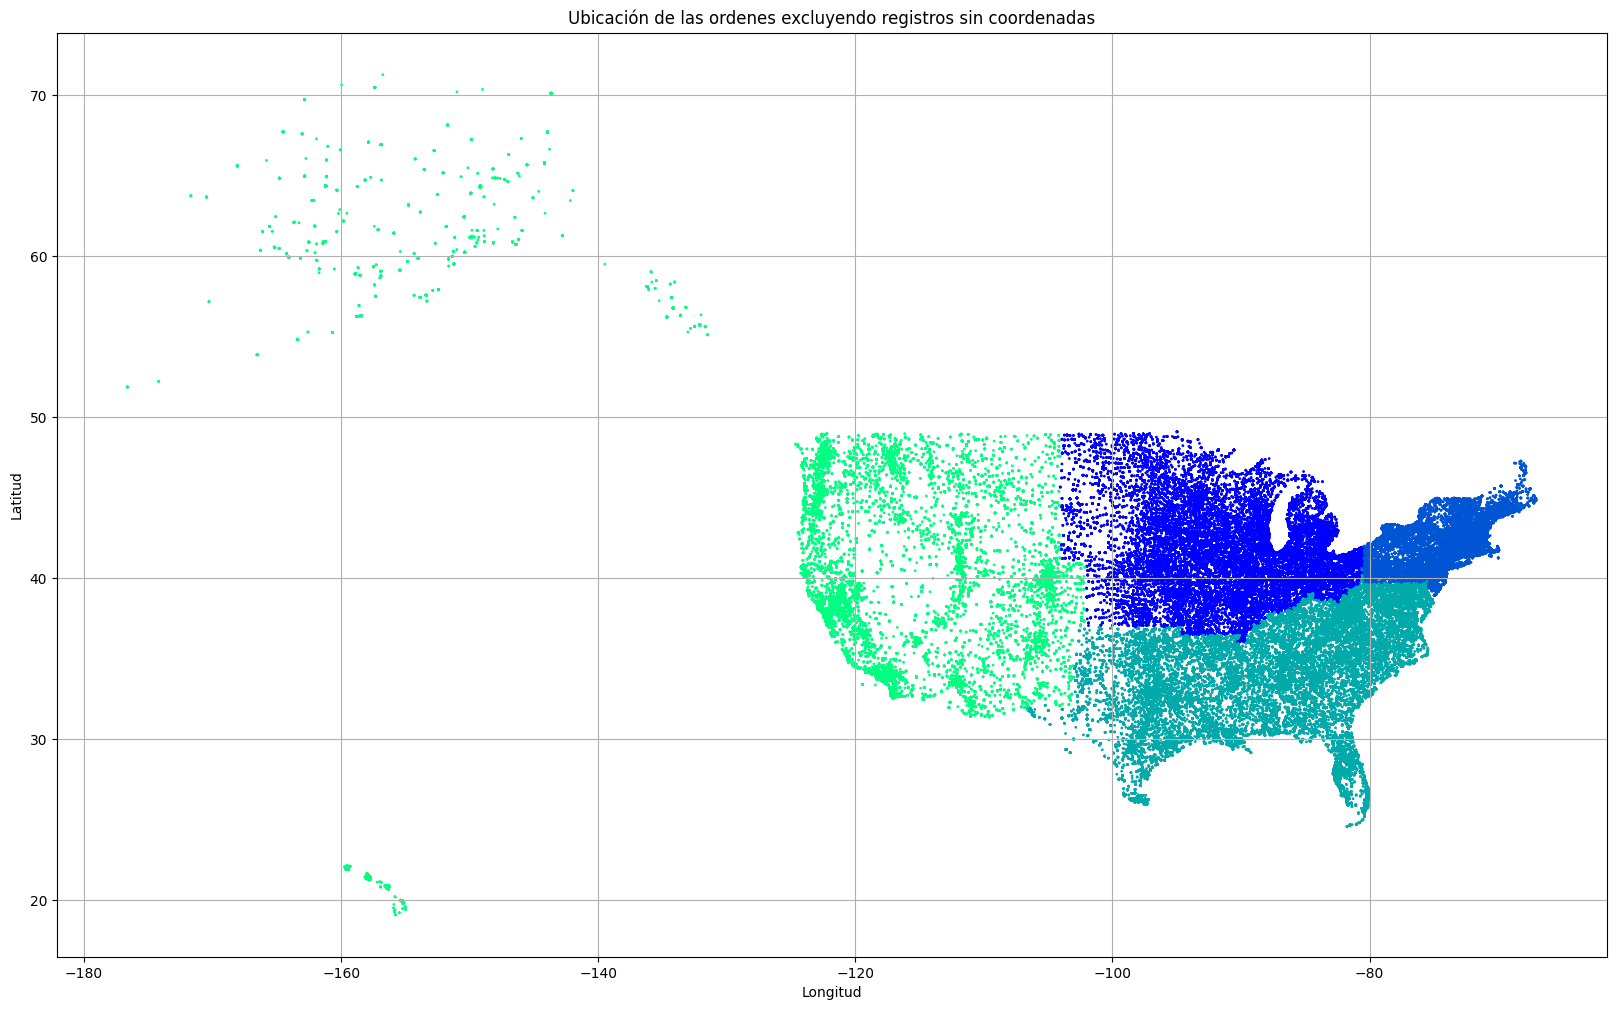

In [16]:
# Graficación de todos los productos vendidos por regiones
plt.figure(figsize=(20, 12))
plt.scatter(X[:,0], X[:,1], c=Y, s=1, cmap='winter')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de las ordenes excluyendo registros sin coordenadas')
plt.grid(True)
plt.show()

In [17]:
# Cálculo rápido de los centroides

# Creamos y entrenamos en modelo KMeans
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(X, Y, size_train, size_valida, size_test)

#Entrenamos con x_train...
modelo_kmeans = KMeans(n_clusters = k).fit(x_train)
#Y extraemos los centroides.
centroides = modelo_kmeans.cluster_centers_
print(centroides)

0.4
[[ -75.60653429   40.81494976]
 [-120.79565455   41.70110227]
 [ -85.55790189   37.25808484]
 [ -97.27831809   38.46125132]]


In [18]:
#Prueba de distancia euclidiana:
muestra = x_train
dataset = X
distancias = distEuclidiana(muestra, dataset)
print(distancias)

[[6865.09790721]
 [6865.09790721]
 [6865.09790721]
 ...
 [7489.49025685]
 [7489.49025685]
 [6564.41033749]]


- La primera vez que se ejecutó la distancia euclidiana duró mas de 15 minutos en hacer el cálculo
- La segunda vez tardó 6 minutos, 14.2 segundos.
- La tercera vez 7m, 3.6.
- La cuarta vez 6m 43.7s

In [19]:
# OBTENCIÓN DE DATOS ESTADÍSTICOS
mean_value =(np.mean(distancias)).round(5)
median_value = (obtenerModa(distancias)).round(5)

print(f'Media de la Distancia euclidiana: {mean_value}')
print(f'Moda de la Distancia euclidiana: {median_value}')


Media de la Distancia euclidiana: 7880.73979
Moda de la Distancia euclidiana: 6034.27501


In [20]:
#Prueba de centroide mas cercano:

muestra = x_train
centroides = centroides
resultado = centroideCercano(muestra, centroides)
print("El centroide mas cercano es: "+str(resultado))

El centroide mas cercano es: 2


[1 1 1 ... 1 1 1]


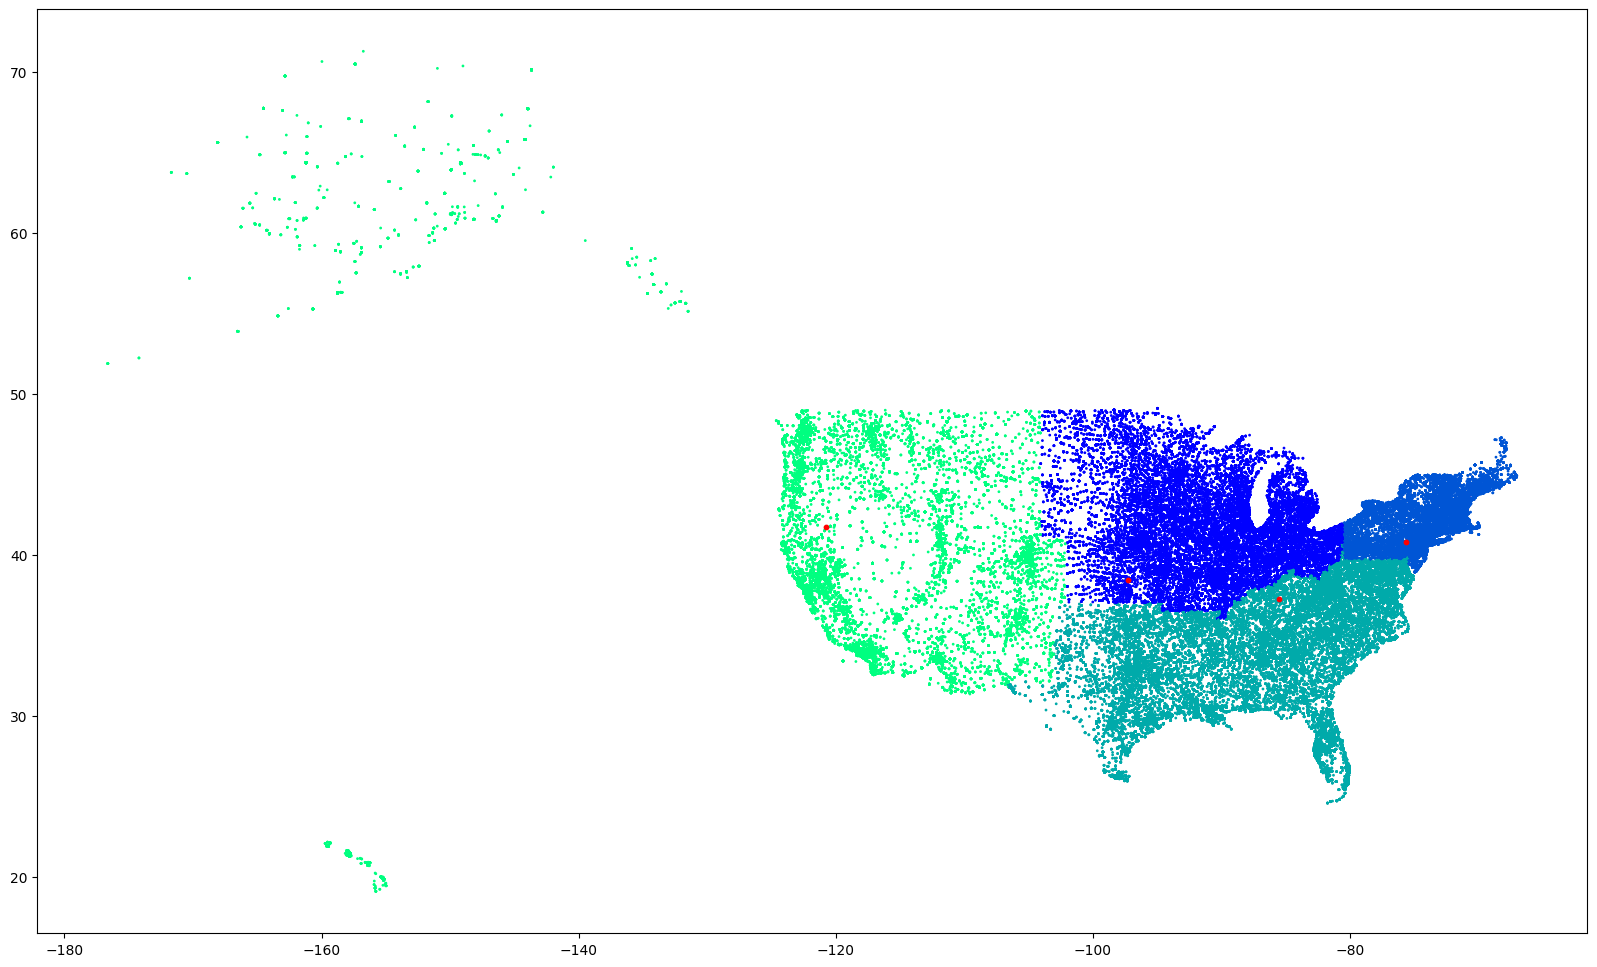

In [21]:
# Prueba de la separación de datos con centroides incluidos

plt.figure(figsize=(20, 12))
plt.scatter(X[:,0], X[:,1], c=Y, s=1, cmap='winter')
plt.scatter(centroides[:,0], centroides[:,1], s=10, c='red')
muestrasCon1, valoresEsperadosCon1 = separarDatos(X,Y,1)
print(valoresEsperadosCon1)

In [22]:
# Obtención del Accuracy

centroidesDummy = centroides
accuracy = obtenerAccuracy_kmedias(muestrasCon1,centroidesDummy)
# print(accuracy)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 51.58%


## REDEFINICIÓN DE ZONAS USANDO CLASIFICADORES y MATRIZ DE CONFUSIÓN

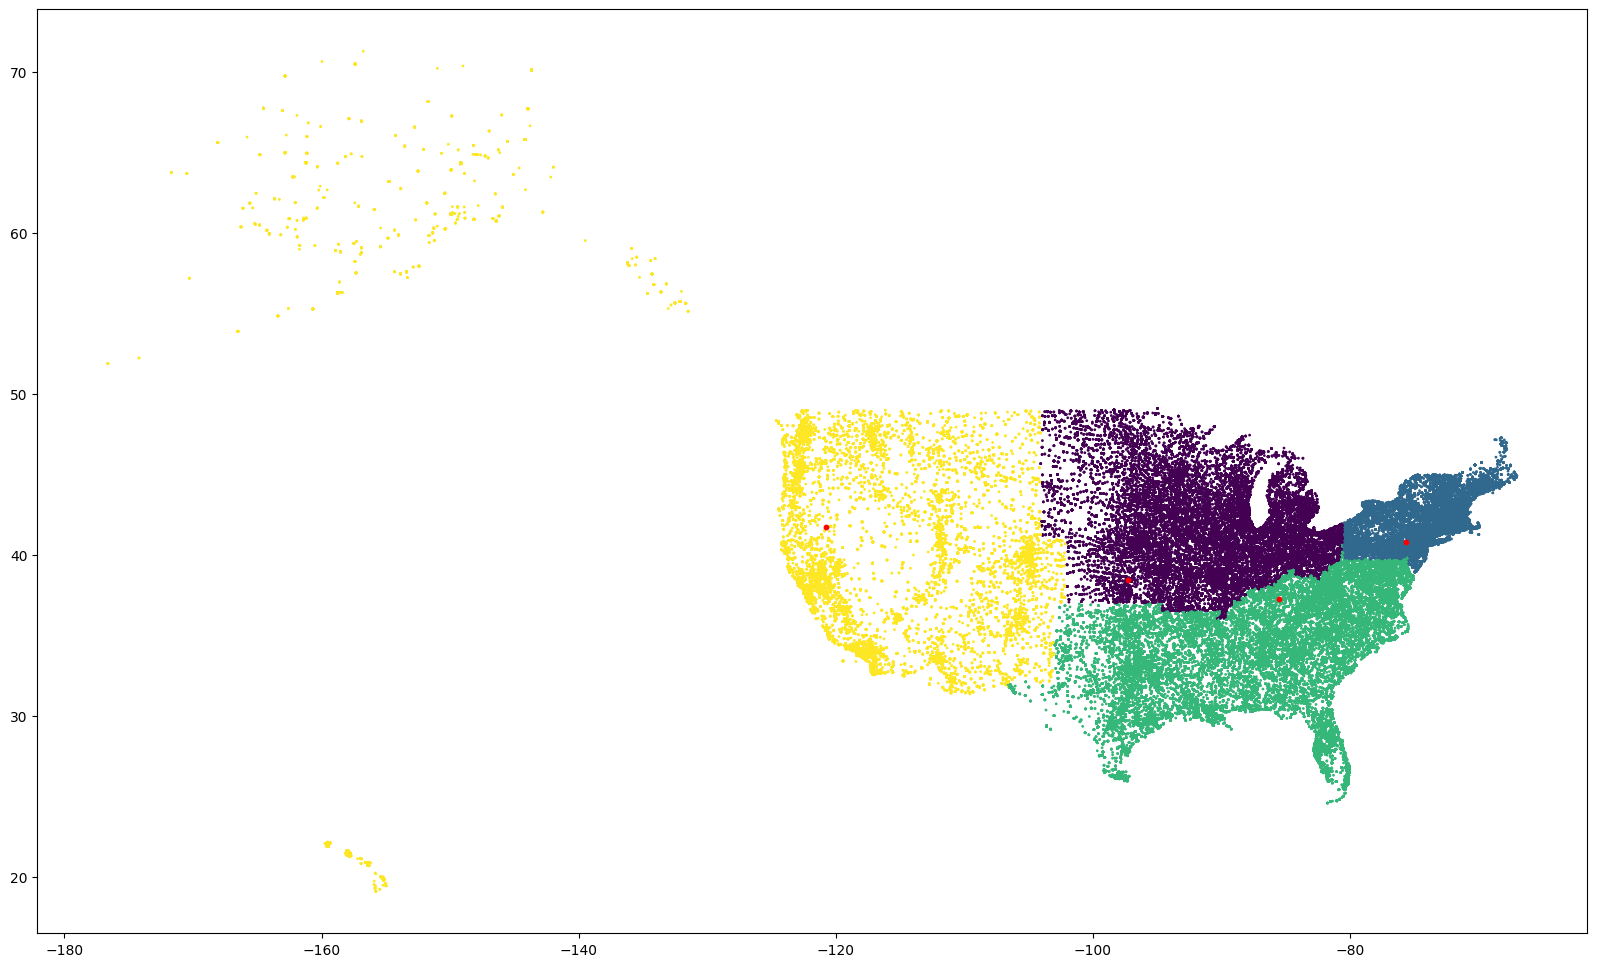

In [23]:
# Hacemos una partición del dataframe
plt.figure(figsize=(20, 12))
plt.scatter(X[:,0], X[:,1], c=Y, s=1)
plt.scatter(centroides[:,0], centroides[:,1], s=10, c='red')
plt.show()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [ ]:
# print(x_train) - Opcional
# print(y_train)
print(Y)

Particiones utilizadas:
- x_train
- y_train
- x_test


#### Evaluación de Naïve Bayes:

In [25]:
# Evaluación del Naïve Bayes
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred_nb = NaiveBayes.predict(x_test) 

# Imprimimos y_pred_nb
# print(y_pred_nb)

# Evaluamos el modelo
evaluar(y_test, y_pred_nb)



[[25810   186  1216   598]
 [    6 16128     0     0]
 [  311  2021 27748   254]
 [  326     0   229 14815]]
(4, 4)
True positives: 14815
True negatives: 25810
False positives: 598
False negative: 326
Precision: 97.776 %.
Sensibilidad: 97.847 %.
Especificidad: 97.736 %.


#### Evaluación de Support Vector Machine:

In [26]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_train, y_train) 
y_pred_svm = SupportVectorMachine.predict(x_test) 

# Imprimimos
# print(y_pred_svm)

# Evaluamos el modelo
evaluar(y_test, y_pred_svm)

[[26664   305   686   155]
 [    0 16119    15     0]
 [  570   587 29142    35]
 [  284     0   168 14918]]
(4, 4)
True positives: 14918
True negatives: 26664
False positives: 155
False negative: 284
Precision: 98.955 %.
Sensibilidad: 98.132 %.
Especificidad: 99.422 %.


#### Evaluación de Redes Neuronales Artificiales: 

In [27]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(x_train, y_train)
y_pred_nn = NeuralNetwork.predict(x_test)

# Imprimimos
# print(y_pred_nn)

# Evaluamos el modelo
evaluar(y_test, y_pred_nn)

[[27297    57   265   191]
 [   87 15945   102     0]
 [  320   142 29830    42]
 [   31     0   155 15184]]
(4, 4)
True positives: 15184
True negatives: 27297
False positives: 191
False negative: 31
Precision: 99.48 %.
Sensibilidad: 99.796 %.
Especificidad: 99.305 %.


#### Evaluación de Random Forests:

In [28]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)

# Imprimimos
# print(y_pred_rfc)

# Evaluamos el modelo
evaluar(y_test, y_pred_rfc)

[[27809     0     1     0]
 [    0 16133     1     0]
 [   10     0 30321     3]
 [    2     0     0 15368]]
(4, 4)
True positives: 15368
True negatives: 27809
False positives: 0
False negative: 2
Precision: 99.995 %.
Sensibilidad: 99.987 %.
Especificidad: 100.0 %.


In [30]:
# Declaramos variable que contiene el tamaño de y_test
size_y_test = y_test.shape

# Declaramos variables que confienen 
size_y_pred_nb = y_pred_nb.shape
size_y_pred_svm = y_pred_svm.shape
size_y_pred_nn = y_pred_nn.shape
size_y_pred_rfc = y_pred_rfc.shape

# Especificamos el valor de y_pred_elegida con la que haya tenido mayor precisión
y_pred_elegida = y_pred_rfc





Redefinimos los centroides

In [33]:
# Cálculo rápido de nuevos centroides

#Entrenamos con x_train...
modelo_kmeans_test = KMeans(n_clusters = k).fit(x_test)

#Y extraemos los centroides.
centroides_test = modelo_kmeans_test.cluster_centers_
print(centroides_test)

[[ -75.58760369   40.82810758]
 [ -97.21446664   38.4027353 ]
 [-120.72690061   41.60340865]
 [ -85.47069573   37.25280453]]


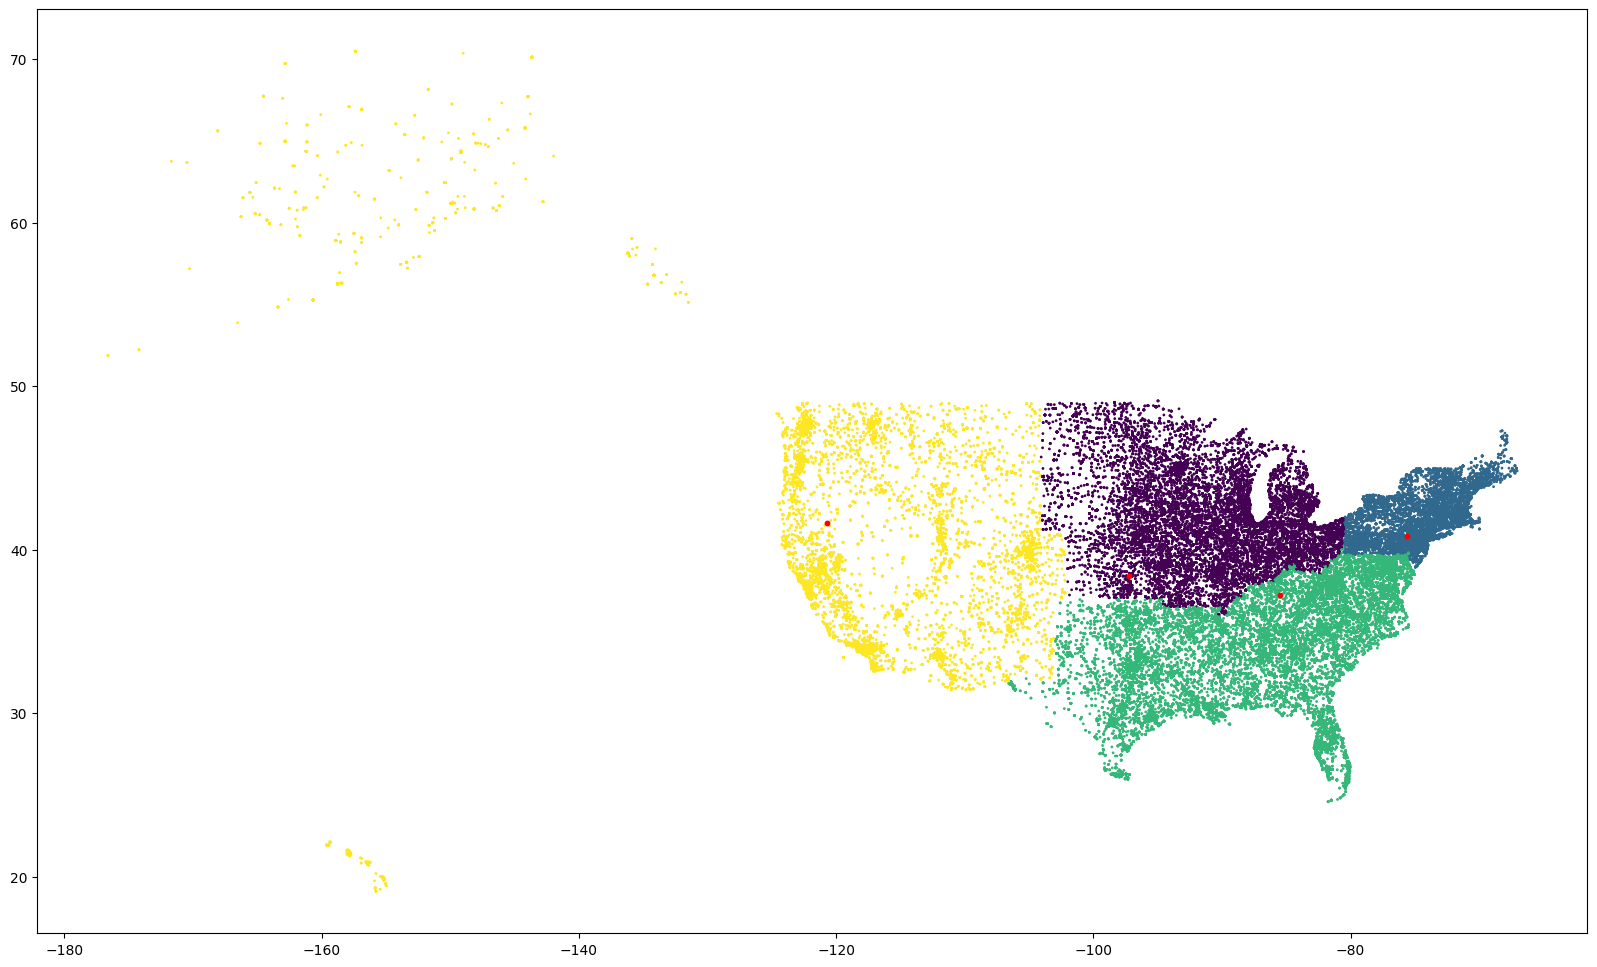

In [34]:
# Hacemos una partición del dataframe
plt.figure(figsize=(20, 12))
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_elegida, s=1)
plt.scatter(centroides_test[:,0], centroides_test[:,1], s=10, c='red')
plt.show()

#### Lazy Classifier - Pendiente

In [ ]:
# Obtenemos 2 array uno de entrada y el otro de salida del dataframe analizable para analizar las clasificaciones
X = df_online_sales_sn[['lng', 'lat']].to_numpy()           # Definimos el clustering con las coordenadas
Y = df_online_sales_sn['Region'].to_numpy()                 # Definimos Y



In [ ]:
# Obtenemos las dimensiones de X
X.shape

In [ ]:
# Imprimimos loas valores de X y Y (Paso opcional)
# print("Valores de X\n", X)
# print("Valores de y\n", y)

In [ ]:
# Graficamos ambas caracteristicas
plt.figure(figsize=(20, 12))
plt.scatter(X[:,0], X[:,1], c=Y, s=0.5)
plt.scatter(centroides[:,0], centroides[:,1], s=10, c='red')
plt.xlabel('Longitud')
plt.ylabel('latitud')
plt.show()

In [ ]:
# Definimos unas variables
k = 4                                                       # Declaramos los clusters en caso de erquerirse
num_rs = 100
# Definimos los tamaños de las particiones
size_train = 0.60
size_valida = 0.10
size_test = 0.30      

In [ ]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size_test, random_state=num_rs)

# Inicializar el modelo
clf = LazyClassifier(verbose=3, ignore_warnings=True, custom_metric=None)

# Entrenamos y predecimos
models_train, predictions_train = clf.fit(X_train, X_test, y_train, y_test)

#### SISTEMA DE RECOMENDACIÓN

#### Empezamos el entrenamiento

In [35]:
# Transformamos en datasets de entrenamiento y prueba
x = df_online_sales[['item_id', 'price']].to_numpy()
y = df_online_sales['category'].map({
    'Appliances': 0,
    'Beauty & Grooming': 1,
    'Books': 2,
    'Computing': 3,
    'Entertainment': 4,
    'Health & Sports': 5,
    'Home & Living': 6,
    'Kids & Baby': 7,
    'Mens Fashion': 8,
    'Mobiles & Tablets': 9,
    'Others': 10,
    'School & Education': 11,
    'Soghaat': 12,
    'Superstore': 13,
    'Womens Fashion': 14

}).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [36]:
# Determinamos los centroides
modelo_kmeans = KMeans(n_clusters = 15).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[7.93980926e+05 6.64943633e+02]
 [6.44899128e+05 7.59343228e+02]
 [8.67838352e+05 1.05538299e+03]
 [7.28433776e+05 4.92670776e+02]
 [6.03158921e+05 6.81817075e+02]
 [7.06848465e+05 5.36804296e+02]
 [7.72159895e+05 1.20241294e+03]
 [8.42953922e+05 1.28717927e+03]
 [6.86228921e+05 1.00812502e+03]
 [8.92821713e+05 1.18470657e+03]
 [6.24139843e+05 7.34212228e+02]
 [7.50482211e+05 9.02825813e+02]
 [5.84275669e+05 6.44469954e+02]
 [8.18271947e+05 4.13791477e+02]
 [6.66012636e+05 9.63707948e+02]]


#### Solicitamos una recomendación

In [46]:
#Sientete libre de cambiar este valor.
indice_df = 5

#Extrae la película que deseas del dataframe.
productoElegido = df_online_sales.iloc[indice_df]

#Obten las características de la pelicula que elegiste.
caracteristicaProducto = productoElegido[['item_id', 'price']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendameProductos(df_online_sales['sku'],x, caracteristicaProducto, centroides)

#E imprime lo que hallaste!
# print("Porque compraste "+productoElegido['sku']+" ...")
print(f'Porque compraste {productoElegido['sku']}, te recomendamos comprar ...')
print(recomendaciones)

Porque compraste 27274, te recomendamos comprar ...
4        31021
5        27274
6        21354
66       31313
67       31313
         ...  
76939    13498
76940    13501
76943     6885
76944    37489
76945     5129
Name: sku, Length: 17818, dtype: int64


In [ ]:
def recomiendameProductos(listaDeProductos, datosProductos,productosEjemplo,centroides):            # Quitar si no es necesario
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = utils.centroideCercano(productosEjemplo, centroides)
    
    #Luego, vamos a clasificar todas las peliculas por centroides.
    clasificaciones = utils.clasificarPorCentroides(datosProductos, centroides)
    
    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]
    
    #Y regresamos la lista de peliculas.
    return listaDeProductos[indices]